In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")
display(df)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [3]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [4]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
df.shape

(1453, 15)

In [6]:
# assuming that mcdonalds is a pandas DataFrame
MD_x = df.iloc[:, 0:11].to_numpy()
MD_x = (MD_x == "Yes").astype(int)

# column names for the output
columns = ["yummy", "convenient", "spicy", "fattening", "greasy",
           "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]
           
means = np.round(np.mean(MD_x, axis=0), 2)
result = pd.DataFrame(data=[means], columns=columns[:11])

print(result.to_string(index=False))

 yummy  convenient  spicy  fattening  greasy  fast  cheap  tasty  expensive  healthy  disgusting
  0.55        0.91   0.09       0.87    0.53   0.9    0.6   0.64       0.36      0.2        0.24


In [7]:
print(MD_x)

[[0 1 0 ... 1 0 0]
 [1 1 0 ... 1 0 0]
 [0 1 1 ... 1 1 0]
 ...
 [1 1 0 ... 1 0 0]
 [1 1 0 ... 0 1 0]
 [0 1 0 ... 1 0 1]]


In [8]:
from sklearn.decomposition import PCA

# assuming that MD_x is a numpy array
MD_pca = PCA().fit(MD_x)
result = MD_pca.explained_variance_ratio_

print(f"Standard deviation: {np.sqrt(MD_pca.explained_variance_)}")
print(f"Proportion of variance explained: {result}")
print(f"Cumulative proportion of variance explained: {np.cumsum(result)}")

Standard deviation: [0.75704952 0.60745556 0.50461946 0.39879859 0.33740501 0.31027461
 0.28969732 0.27512196 0.2652511  0.24884182 0.23690284]
Proportion of variance explained: [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
Cumulative proportion of variance explained: [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [9]:
print(np.round(MD_pca.components_, 1))

[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


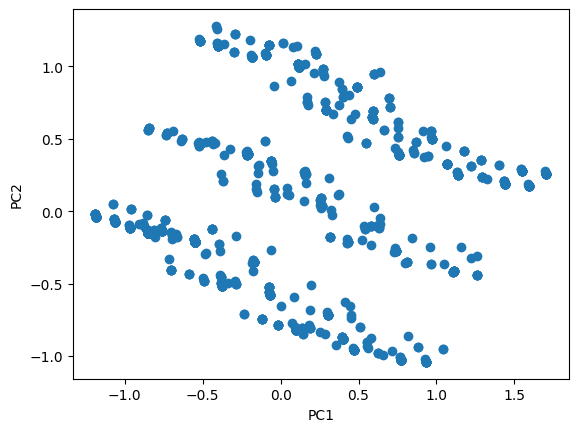

In [10]:

from sklearn.decomposition import PCA

# assuming that MD_x is a numpy array
MD_pca = PCA().fit(MD_x)

# Transform the original data using the fitted PCA model
MD_pca_transformed = MD_pca.transform(MD_x)

# Plot the transformed data on a scatter plot
plt.scatter(MD_pca_transformed[:, 0], MD_pca_transformed[:, 1])

# Add axis labels
plt.xlabel("PC1")
plt.ylabel("PC2")

# Show the plot
plt.show()

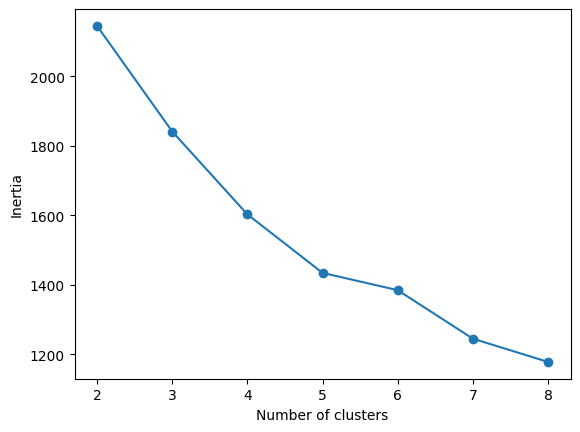

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

np.random.seed(1234)

# Assuming MD_x is a numpy array
k_values = range(2, 9)
inertias = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
    kmeans.fit(MD_x)
    inertias.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(k_values, inertias, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

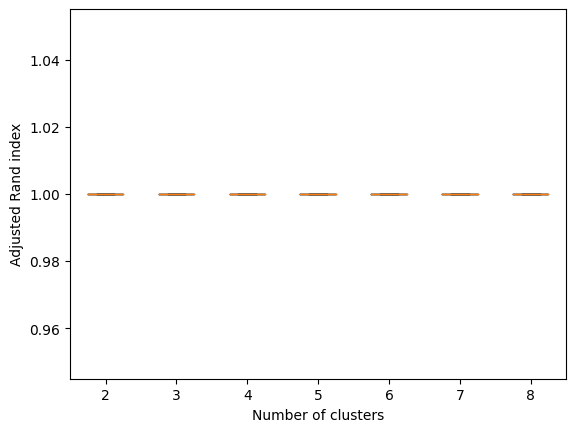

In [12]:
from sklearn.cluster import KMeans
from sklearn.utils import resample
from sklearn.metrics import adjusted_rand_score

np.random.seed(1234)

# Assuming MD_x is a numpy array
k_values = range(2, 9)
nrep = 10
nboot = 100
boot_indices = range(len(MD_x))
boot_scores = np.zeros((len(k_values), nboot))

for i, k in enumerate(k_values):
    for j in range(nboot):
        # Bootstrap sample data
        boot_data = resample(MD_x, random_state=j)
        # Fit KMeans model
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=0)
        kmeans.fit(boot_data)
        # Calculate adjusted Rand score
        true_labels = np.zeros_like(boot_indices)
        true_labels[:len(boot_data)] = kmeans.labels_
        boot_scores[i, j] = adjusted_rand_score(true_labels, kmeans.labels_)

# Plot the bootstrap results
plt.boxplot(boot_scores.T, labels=k_values)
plt.xlabel("Number of clusters")
plt.ylabel("Adjusted Rand index")
plt.show()